# 🟦 AVL-Baum (AVL Tree)

## 1️⃣ Grundidee
Ein AVL-Baum ist ein **selbstbalancierender binärer Suchbaum**.
Er hält die Baumhöhe klein, indem er nach jedem Einfügen/Löschen die **Balance** überprüft und bei Bedarf **Rotationen** ausführt.

**Balance-Faktor (BF):**
- BF = Höhe(linker Teilbaum) − Höhe(rechter Teilbaum)
- In einem AVL-Baum gilt für jeden Knoten: **BF ∈ {-1, 0, +1}**

➡️ Ziel: garantiert **O(log n)** für Suche/Insert/Delete.

### Beispiel für Balance-Faktoren
Im folgenden Bild ist ersichtlich, dass die Balance-Faktoren aller Knoten -1, 0 oder +1 sind.

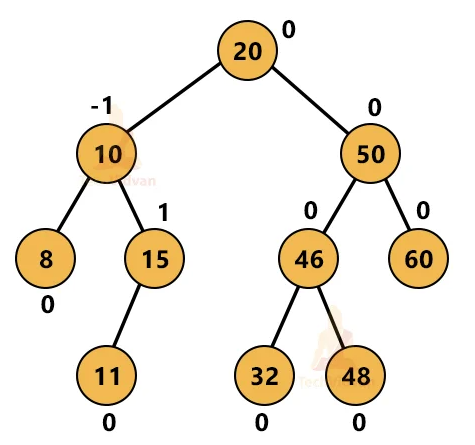

---

## 2️⃣ Voraussetzungen
- Elemente müssen **vergleichbar** sein (Ordnung <, >)
- Wie beim BST: Duplikate nur mit klarer Regel (oder verbieten)

---

## 3️⃣ Laufzeiten & Eigenschaften

| Eigenschaft | Wert |
|------------|------|
| Suche | O(log n) |
| Einfügen | O(log n) |
| Löschen | O(log n) |
| Speicherbedarf | O(n) |
| In-place | nein |
| Stabil | nein |

**Hinweis:**
Der große Vorteil gegenüber einem normalen BST: **kein Worst Case O(n)**, weil die Höhe kontrolliert bleibt.

---

## 4️⃣ Schritt-für-Schritt-Beispiel

Wir fügen ein:
```
[10, 20, 30]
```

### Nach Einfügen von 10 und 20
```
  10
    \
     20
```

### Einfügen von 30 → Baum kippt (RR-Fall)
```
  10
    \
     20
       \
        30
```

Balance bei 10 ist -2 → Rotation nötig.

### Linksrotation (RR-Fall)
```
    20
   /  \
 10   30
```

Ergebnis: wieder AVL-balanciert.

### AVL Tree – Algorithmus in Worten (Grundidee)

Ein AVL-Baum ist ein selbstbalancierender binärer Suchbaum.\
Für jeden Knoten wird die Höhe des linken und rechten Teilbaums betrachtet.\
Die Differenz dieser Höhen heißt Balance-Faktor.\
Ein AVL-Baum stellt sicher, dass dieser Balance-Faktor für jeden Knoten\
nur die Werte −1, 0 oder +1 annimmt.\
Dadurch bleibt der Baum stets annähernd ausgeglichen\
und degeneriert nicht zu einer linearen Struktur.\

### Einfügen in einen AVL Tree – Algorithmus in Worten

Der neue Wert wird zunächst wie bei einem normalen binären Suchbaum eingefügt.\
Nach dem Einfügen wird die Höhe der betroffenen Knoten aktualisiert.\
Anschließend wird der Balance-Faktor jedes Knotens überprüft.\
Ist der Balance-Faktor außerhalb des erlaubten Bereichs, liegt eine Unbalance vor.\
Diese Unbalance wird durch geeignete Rotationen korrigiert.\
Nach der Rotation erfüllt der Baum wieder die AVL-Bedingung.\

### Balancieren durch Rotationen – Algorithmus in Worten

Tritt eine Unbalance auf, wird die Struktur des Teilbaums analysiert.\
Je nach Einfügeposition ergeben sich vier mögliche Fälle.\
Durch eine oder zwei Rotationen wird der Baum neu ausgerichtet.\
Dabei bleibt die Ordnungsregel des binären Suchbaums erhalten.\
Nach der Rotation ist der Teilbaum wieder balanciert.\

---

## 5️⃣ Besonderheiten / Prüfungsrelevante Hinweise

### Warum AVL?
- garantiert logarithmische Höhe → garantiert schnelle Operationen

### Die 4 Rotationsfälle (klassischer Prüfungsstoff)
1. **LL-Fall** → Rechtsrotation
2. **RR-Fall** → Linksrotation
3. **LR-Fall** → Linksrotation auf linkses Kind, dann Rechtsrotation
4. **RL-Fall** → Rechtsrotation auf rechtes Kind, dann Linksrotation

**LL-Fall (Links–Links):**\
Einfügen im linken Teilbaum des linken Kindes → Rechtsrotation

**RR-Fall (Rechts–Rechts):**\
Einfügen im rechten Teilbaum des rechten Kindes → Linksrotation

**LR-Fall (Links–Rechts):**\
Einfügen im rechten Teilbaum des linken Kindes →
zuerst Linksrotation, danach Rechtsrotation

**RL-Fall (Rechts–Links):**\
Einfügen im linken Teilbaum des rechten Kindes →
zuerst Rechtsrotation, danach Linksrotation

**Merke:**
- LL/RR = einfache Rotation
- LR/RL = doppelte Rotation

### Links-Rotation weil RR-Fall (Rechts-Rechts)
```
    z                               y
   / \                            /   \
  T1  y     Links-Rotation(z)   z     x
     / \   - - - - - - - - ->   / \   / \
    T2  x                      T1 T2 T3 T4
       / \
      T3 T4
```

Die Blätter T1, T2, T3 und T4 zählen als Höhe 1.\
Es gilt Höhe = 1 + max(Höhe(linker Teilbaum), Höhe(rechter Teilbaum)).\
Somit ist x = 1 + max(Höhe(T3), Höhe(T4)).\
Also Höhe(x) = 1 + 1 = 2\
Jetzt die Höhe von y berechnen.\
Höhe(y) = 1 + max(Höhe(T2), Höhe(x)) = 1 + max(1, 2) = 3\
Zuletzt die Höhe von z berechnen.\
Höhe(z) = 1 + max(Höhe(T1), Höhe(y)) = 1 + max(1, 3) = 4

### Rechts-Rotation weil LL-Fall (Links-Links)
```
    z                               y
   / \                            /   \
  y   T4     Rechts-Rotation(z)  x     z
 / \       - - - - - - - - ->   / \   / \
x   T3                         T1 T2 T3 T4
/ \
T1 T2
```

Die Blätter T1, T2, T3 und T4 zählen als Höhe 1.\
Es gilt Höhe = 1 + max(Höhe(linker Teilbaum), Höhe(rechter Teilbaum)).\
Somit ist x = 1 + max(Höhe(T1), Höhe(T2)).\
Also Höhe(x) = 1 + 1 = 2\
Jetzt die Höhe von y berechnen.\
Höhe(y) = 1 + max(Höhe(x), Höhe(T3)) = 1 + max(2, 1) = 3\
Zuletzt die Höhe von z berechnen.\
Höhe(z) = 1 + max(Höhe(y), Höhe(T4)) = 1 + max(3, 1) = 4

### Links-Rechts-Rotation weil LR-Fall (Links-Rechts)
```
      z                           z                            x
     / \                         / \                         /   \
    y   T4   Links-Rotation(y)  x   T4   Rechts-Rotation(z) y     z
   / \      - - - - - - - - -> / \        - - - - - - - -> / \   / \
  T1  x                       y   T3                      T1 T2 T3 T4
     / \                     / \
    T2 T3                   T1 T2
```

Die Blätter T1, T2, T3 und T4 zählen als Höhe 1.\
Es gilt Höhe = 1 + max(Höhe(linker Teilbaum), Höhe(rechter Teilbaum)).\
Somit ist x = 1 + max(Höhe(T2), Höhe(T3)).\
Also Höhe(x) = 1 + 1 = 2\
Jetzt die Höhe von y berechnen.\
Höhe(y) = 1 + max(Höhe(T1), Höhe(x)) = 1 + max(1, 2) = 3\
Zuletzt die Höhe von z berechnen.\
Höhe(z) = 1 + max(Höhe(y), Höhe(T4)) = 1 + max(3, 1) = 4

### Rechts-Links-Rotation weil RL-Fall (Rechts-Links)
```
    z                           z                            x
   / \                         / \                         /   \
  T1  y    Rechts-Rotation(y) T1  x    Links-Rotation(z)  z     y
     / \   - - - - - - - - ->    / \    - - - - - - - -> / \   / \
    x   T4                     T2  y                    T1 T2 T3 T4
   / \                            / \
  T2 T3                          T3 T4
```

Die Blätter T1, T2, T3 und T4 zählen als Höhe 1.\
Es gilt Höhe = 1 + max(Höhe(linker Teilbaum), Höhe(rechter Teilbaum)).\
Somit ist x = 1 + max(Höhe(T2), Höhe(T3)).\
Also Höhe(x) = 1 + 1 = 2\
Jetzt die Höhe von y berechnen.\
Höhe(y) = 1 + max(Höhe(T3), Höhe(T4)) = 1 + max(1, 1) = 2\
Zuletzt die Höhe von z berechnen.\
Höhe(z) = 1 + max(Höhe(T1), Höhe(x)) = 1 + max(1, 2) = 3

---

## 6️⃣ Vor- und Nachteile

### Vorteile
- garantierte Laufzeiten O(log n)
- sehr gute Suchperformance
- verhindert degenerierte Bäume

### Nachteile
- komplexer als BST
- Rotationen verursachen Overhead
- Implementierung fehleranfälliger

---

## 🧠 Merksatz für die Prüfung
*AVL-Bäume sind selbstbalancierende BSTs mit Balance-Faktor -1..+1 und garantieren O(log n) durch Rotationen.*

---

## 7️⃣ Python-Implementierung

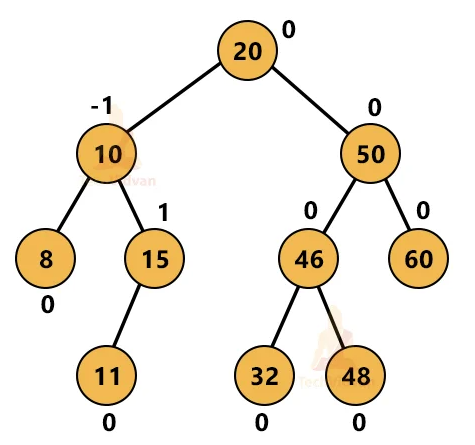

In [1]:
class AVLNode:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.height = 1  # Blatt: Höhe 1


class AVLTree:
    def insert(self, root, value):
        # 1) Normaler BST-Insert
        if root is None:
            return AVLNode(value)

        if value < root.value:
            root.left = self.insert(root.left, value)
        else:
            root.right = self.insert(root.right, value)

        # 2) Höhe updaten
        root.height = 1 + max(self.get_height(root.left), self.get_height(root.right))

        # 3) Balance prüfen
        balance = self.get_balance(root)

        # 4) Rotationen (4 Fälle)
        # LL
        if balance > 1 and value < root.left.value:
            return self.rotate_right(root)

        # RR
        if balance < -1 and value > root.right.value:
            return self.rotate_left(root)

        # LR
        if balance > 1 and value > root.left.value:
            root.left = self.rotate_left(root.left)
            return self.rotate_right(root)

        # RL
        if balance < -1 and value < root.right.value:
            root.right = self.rotate_right(root.right)
            return self.rotate_left(root)

        return root

    def get_height(self, node):
        return node.height if node else 0

    def get_balance(self, node):
        if not node:
            return 0
        return self.get_height(node.left) - self.get_height(node.right)

    def rotate_left(self, z):
        y = z.right
        T2 = y.left

        # Rotation
        y.left = z
        z.right = T2

        # Höhen aktualisieren
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        return y

    def rotate_right(self, z):
        y = z.left
        T3 = y.right

        # Rotation
        y.right = z
        z.left = T3

        # Höhen aktualisieren
        z.height = 1 + max(self.get_height(z.left), self.get_height(z.right))
        y.height = 1 + max(self.get_height(y.left), self.get_height(y.right))

        return y

    def inorder(self, node, result):
        if node:
            self.inorder(node.left, result)
            result.append(node.value)
            self.inorder(node.right, result)


# Beispiel
avl = AVLTree()
root = None
for v in [10, 20, 30, 40, 50, 25]:
    root = avl.insert(root, v)

res = []
avl.inorder(root, res)
print(res)  # sortierte Ausgabe

[10, 20, 25, 30, 40, 50]
